In [1]:
from INTERVIEW.HR.hr_graph import hr_graph
hr = hr_graph()

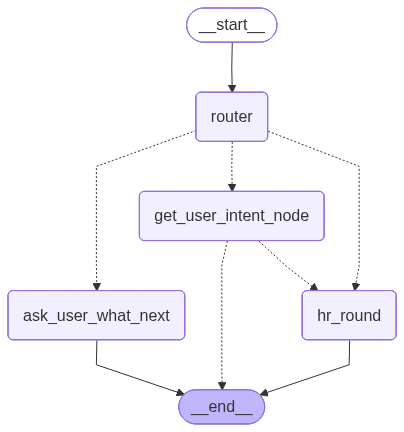

In [2]:
hr

In [1]:
import requests

def fetch_project_context(repo_url: str, n_commits: int = 5):
    """
    Fetch minimal project context from a public GitHub repository.
    Includes: name, owner, description, README, file list, commits.
    """

    # Extract owner & repo name from URL
    parts = repo_url.strip("/").split("/")
    owner, repo = parts[-2], parts[-1]

    base_api = f"https://api.github.com/repos/{owner}/{repo}"
    base_raw = f"https://raw.githubusercontent.com/{owner}/{repo}/main"

    context = {
        "repo_name": repo,
        "readme": None,
        "files": [],
        "recent_commits": []
    }


    # --- 2. README.md ---
    readme_url = f"{base_raw}/README.md"
    readme_resp = requests.get(readme_url)
    if readme_resp.status_code == 200:
        context["readme"] = readme_resp.text

    # --- 3. File tree (top level only) ---
    tree_resp = requests.get(f"{base_api}/contents")
    if tree_resp.status_code == 200:
        context["files"] = [item["name"] for item in tree_resp.json()]

    # --- 4. Recent commits ---
    commit_resp = requests.get(f"{base_api}/commits", params={"per_page": n_commits})
    if commit_resp.status_code == 200:
        commits = commit_resp.json()
        context["recent_commits"] = [c["commit"]["message"] for c in commits]

    return context

In [2]:
repo = "https://github.com/Pandharimaske/Coffee_Shop_ChatBot"
data = fetch_project_context(repo)

from pprint import pprint
pprint(data)

{'files': ['.DS_Store', 'Python_Backend', 'README.md', 'frontend'],
 'readme': '\n'
           '# ☕ Coffee Shop Chatbot\n'
           '\n'
           'This is a multi-agent, modular chatbot system designed for '
           "automating a coffee shop's customer interactions, such as placing "
           'orders, updating them, and getting recommendations or menu '
           'details. The system leverages **agent-based design** for '
           'scalability, flexibility, and contextual intelligence.\n'
           '\n'
           '---\n'
           '\n'
           '## 🔁 Architecture Overview\n'
           '\n'
           '```mermaid\n'
           'flowchart TD\n'
           '    Start[__start__] --> Rewrite[query_rewrite]\n'
           '    Rewrite --> Guard[guard]\n'
           '    Guard --> Memory[memory]\n'
           '    Memory --> Classify[classify]\n'
           '    Classify --> DetailsAgent[details_agent]\n'
           '    Classify --> RecommendAgent[recommendation_agent]\n'
  

In [1]:
import requests

def fetch_github_readme(repo_url: str) -> str | None:
    """
    Fetch README.md content from a GitHub repo.
    repo_url: "https://github.com/username/repo"
    """
    try:
        parts = repo_url.rstrip("/").split("/")
        owner, repo = parts[-2], parts[-1]

        # GitHub raw URL
        raw_url = f"https://raw.githubusercontent.com/{owner}/{repo}/main/README.md"
        resp = requests.get(raw_url, timeout=10)

        if resp.status_code == 200:
            return resp.text
        else:
            return None
    except Exception:
        return None

In [2]:
repo = "https://github.com/Pandharimaske/Coffee_Shop_ChatBot"
data = fetch_github_readme(repo)

from pprint import pprint
pprint(data)

('\n'
 '# ☕ Coffee Shop Chatbot\n'
 '\n'
 'This is a multi-agent, modular chatbot system designed for automating a '
 "coffee shop's customer interactions, such as placing orders, updating them, "
 'and getting recommendations or menu details. The system leverages '
 '**agent-based design** for scalability, flexibility, and contextual '
 'intelligence.\n'
 '\n'
 '---\n'
 '\n'
 '## 🔁 Architecture Overview\n'
 '\n'
 '```mermaid\n'
 'flowchart TD\n'
 '    Start[__start__] --> Rewrite[query_rewrite]\n'
 '    Rewrite --> Guard[guard]\n'
 '    Guard --> Memory[memory]\n'
 '    Memory --> Classify[classify]\n'
 '    Classify --> DetailsAgent[details_agent]\n'
 '    Classify --> RecommendAgent[recommendation_agent]\n'
 '    Classify --> OrderAgent[order_taking_agent]\n'
 '    Classify --> UpdateAgent[update_order_agent]\n'
 '\n'
 '\n'
 '    DetailsAgent[details_agent] --> Final[final_response]\n'
 '    RecommendAgent[recommendation_agent] --> Final\n'
 '    OrderAgent[order_taking_agent] --> F

In [2]:
from requests import get
from app.db import get_resume
resume = get_resume("pandharinath1437@gmail.com")

In [5]:
type(resume['projects'])

list

In [4]:
for i , proj in enumerate(resume['projects']):
    print(f"i = {i} and Project: {proj}")

i = 0 and Project: {'features': ['modular multi-agent chatbot', 'custom tools for menu retrieval, order management, and user interaction', 'long-term and short-term memory using Supabase and Pinecone', 'Agentic RAG with BGE embeddings for contextual grounding and semantic search'], 'live_link': 'https://coffee-shop-chatbot-p7tr.onrender.com', 'tech_stack': ['Python', 'FastAPI', 'LangGraph', 'LangChain', 'Pinecone', 'Supabase', 'Hugging Face', 'Groq'], 'github_link': 'https://github.com/Pandharimaske/Coffee_Shop_ChatBot', 'time_period': 'June 2025 – Present', 'project_name': 'AI-Powered Coffee Shop Chatbot'}
i = 1 and Project: {'features': ['intelligent book recommendation system', 'query pipeline to match user prompts with relevant books', 'lightweight and interactive front-end using Gradio'], 'live_link': None, 'tech_stack': ['Python', 'LangChain', 'SentenceTransformers', 'ChromaDB', 'Hugging Face', 'Gradio'], 'github_link': 'https://github.com/Pandharimaske/LLM_Book_Recomender', 'tim